# **Question 1 Analyzing the Wikipedia voters network [27 points]**

---



In [ ]:
#Run these lines if files are in Gdrive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
!pip install snap-stanford #installing snap-stanford, can be commented if already installed

##**Both Wiki-Vote.txt and stackoverflow-Java.txt files must be in same local folder**

In [ ]:
# Load the Wikipedia voting network using SNAP for Python
import snap
# Use below lines if Gdrive is used
# path = '/content/drive/MyDrive/Wiki-Vote.txt'
# Graph = snap.LoadEdgeList(snap.PNGraph, path, 0, 1)


Graph = snap.LoadEdgeList(snap.PNGraph, 'Wiki-Vote.txt', 0, 1)


print('Compute and print out the following statistics for the wiki-Vote network:')
print(" ")

# Number of nodes in the network
NumberofNodes = Graph.GetNodes()
print("Number of nodes: %d" % NumberofNodes)
print("**********************")

# Number of nodes with a self-edge
NumberofSelf_Edges = snap.CntSelfEdges(Graph)
print("Number of nodes with a self-edge: %d" % NumberofSelf_Edges)
print("**********************")

# Number of directed edges in the network
No_of_Directed_Edges = snap.CntUniqDirEdges(Graph)
print("Number of directed edges: %d" % No_of_Directed_Edges)
print("**********************")

# Number of undirected edges in the network
No_of_UnDirected_Edges = snap.CntUniqUndirEdges(Graph)
print("Number of undirected edges: %d" % No_of_UnDirected_Edges)
print("**********************")

# 5. Number of reciprocated edges in the network
No_of_Reciprocated_Edges = snap.CntUniqBiDirEdges(Graph)
print("Number of reciprocated edges: %d" % No_of_Reciprocated_Edges)
print("**********************")

# Number of nodes of zero out-degree
No_of_ZeroOut_Deg = snap.CntOutDegNodes(Graph, 0)
print("Number of nodes of zero out-degree: %d" % No_of_ZeroOut_Deg)
print("**********************")

# Number of nodes of zero in-degree
No_of_ZeroIn_Deg = snap.CntInDegNodes(Graph, 0)
print("Number of nodes of zero in-degree: %d" % No_of_ZeroIn_Deg)
print("**********************")

# Number of nodes with more than 10 outgoing edges
No_of_OutDeg_Lim10 = snap.TIntPrV()
snap.GetNodeOutDegV(Graph, No_of_OutDeg_Lim10)
filtered_list = [item for item in No_of_OutDeg_Lim10 if item.GetVal2() > 10]
Count = len(filtered_list)
print("Number of nodes with more than 10 outgoing edges: %d" % Count)
print("**********************")

# Uncomment the below code for each node output
# Count = 0
# for item in NumOutDegLt10:
#     if item.GetVal2() > 10:
#         Count +=1
        # print("[%d] node ID %d: out-degree %d" % (Count, item.GetVal1(), item.GetVal2()))
# print("**********************")

# Number of nodes with fewer than 10 incoming edges
No_of_InDeg_Lim10 = snap.TIntPrV()
snap.GetNodeInDegV(Graph, No_of_InDeg_Lim10)
filtered_list = [item for item in No_of_InDeg_Lim10 if item.GetVal2() < 10]
Count = len(filtered_list)
print("Number of nodes with fewer than 10 incoming edges: %d" % Count)
# Uncomment the below code for each node output
# Count = 0
# for item in NumInDegLt10:
#     if item.GetVal2() < 10:
#         Count += 1
        # print("[%d] node ID %d: In-degree %d" % (Count, item.GetVal1(), item.GetVal2()))
# print("**********************")

Compute and print out the following statistics for the wiki-Vote network:
 
Number of nodes: 7115
**********************
Number of nodes with a self-edge: 0
**********************
Number of directed edges: 103689
**********************
Number of undirected edges: 100762
**********************
Number of reciprocated edges: 2927
**********************
Number of nodes of zero out-degree: 1005
**********************
Number of nodes of zero in-degree: 4734
**********************
Number of nodes with more than 10 outgoing edges: 1612
**********************
Number of nodes with fewer than 10 incoming edges: 5165


#**Question 2 Further Analyzing the Wikipedia voters network**

###**Plot the distribution of out-degrees of nodes in the network on a log-log scale**

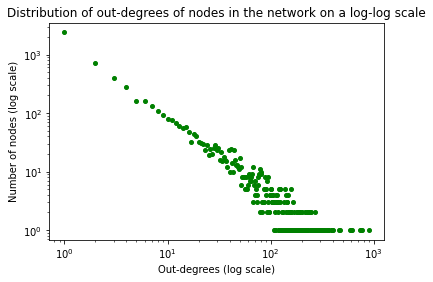

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

#Loading the wikivote text data
Graph = nx.read_edgelist("Wiki-Vote.txt", create_using=nx.DiGraph)

#Computing the out-degree of each node
out_degrees = dict(Graph.out_degree())

#Calculate the frequency of each out-degree value
out_degree_counts = dict(Counter(out_degrees.values()))

#Filter out any data points with a 0 entry
out_degree_counts = {k: v for k, v in out_degree_counts.items() if k != 0}

#Plot the distribution of out-degrees on a log-log scale
x, y = zip(*out_degree_counts.items())
plt.loglog(x, y, "go", markersize=4)
plt.title("Distribution of out-degrees of nodes in the network on a log-log scale")
plt.xlabel("Out-degrees (log scale)")
plt.ylabel("Number of nodes (log scale)")
plt.show()


#**Question 3 -- Finding Experts on the Java Programming Language on StackOverflow**

###**Computing and printing out the statistics for the stackoverflow-Java network:**

In [ ]:
import snap

# Load the StackOverflow network
graph = snap.LoadEdgeList(snap.PNGraph, 'stackoverflow-Java.txt', 0, 1)

# Calculate the number of weakly connected components
wccs = snap.TCnComV()
snap.GetWccs(graph, wccs)
num_wccs = len(wccs)

print("Computing and printing out the statistics for the stackoverflow-Java network:")
print("  ")
print("The number of weakly connected components in the network: ", num_wccs)
print("**********************")

# Get the largest weakly connected component
Wcc = snap.GetMxWcc(graph)

# Get the number of nodes and edges in the largest weakly connected component
num_nodes = Wcc.GetNodes()
num_edges = Wcc.GetEdges()
print("")
print("Number of nodes in largest weakly connected component:", num_nodes)
print("Number of edges in largest weakly connected component:", num_edges)
print("**********************")

# Using GetPageRank to Calculate the PageRank scores
PageRank = snap.TIntFltH()
snap.GetPageRank(graph, PageRank)

# Find the top 3 most central nodes by PageRank scores
top_nodes = [(node_id, PageRank[node_id]) for node_id in PageRank]
top_nodes = sorted(top_nodes, key=lambda x: x[1], reverse=True)[:3]

print("Top 3 most central nodes by PageRank scores:")
print("")
for node_id, score in top_nodes:
    print("Node:", node_id, "Score:", score)

print("**********************")

# Using GetHits to Calculate the HITS scores
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(graph, NIdHubH, NIdAuthH)

# Find the top 3 hubs and top 3 authorities in the graph
top_hubs = [(node_id, NIdHubH[node_id]) for node_id in NIdHubH]
top_hubs = sorted(top_hubs, key=lambda x: x[1], reverse=True)[:3]

top_auths = [(node_id, NIdAuthH[node_id]) for node_id in NIdAuthH]
top_auths = sorted(top_auths, key=lambda x: x[1], reverse=True)[:3]

print("Top 3 hubs by HITS scores:")
print("")
for node_id, score in top_hubs:
    print("Node:", node_id, "Score:", score)
print("**********************")
print("Top 3 authorities by HITS scores:")
print("")
for node_id, score in top_auths:
    print("Node:", node_id, "Score:", score)


Computing and printing out the statistics for the stackoverflow-Java network:
  
The number of weakly connected components in the network:  10143
**********************

Number of nodes in largest weakly connected component: 131188
Number of edges in largest weakly connected component: 322486
**********************
Top 3 most central nodes by PageRank scores:

Node: 992484 Score: 0.013980540412209575
Node: 135152 Score: 0.010005538895741885
Node: 22656 Score: 0.007103532693128619
**********************
Top 3 hubs by HITS scores:

Node: 892029 Score: 0.07336380373389548
Node: 1194415 Score: 0.05955074418794487
Node: 359862 Score: 0.05687564588068672
**********************
Top 3 authorities by HITS scores:

Node: 22656 Score: 0.6047239730413133
Node: 157882 Score: 0.2986993488728824
Node: 571407 Score: 0.2839071934144654


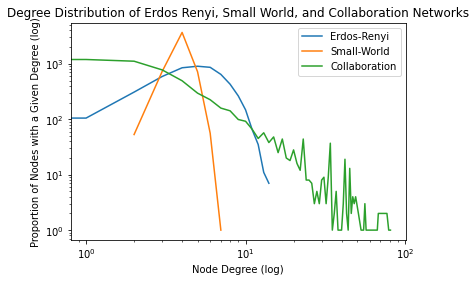

In [ ]:
import snap
import numpy as np
import matplotlib.pyplot as plt

# Load collaboration network
GraphCollab = snap.LoadEdgeList(snap.PUNGraph, "CA-GrQc.txt", 0, 1)

# Remove self-edges from collaboration network
for edge in GraphCollab.Edges():
    if edge.GetSrcNId() == edge.GetDstNId():
        GraphCollab.DelEdge(edge.GetSrcNId(), edge.GetDstNId())

# Generate Erdos-Renyi random network
n = 5242
m = 14484
GraphER = snap.PUNGraph.New()
for i in range(n):
    GraphER.AddNode(i)
for i in range(n):
    for j in range(i+1, n):
        if GraphER.GetEdges() >= m:
            break
        if np.random.rand() < m / (n*(n-1)/2):
            GraphER.AddEdge(i, j)

# Generate Small-World random network
GraphSW = snap.GenSmallWorld(n, 2, 0.1)

# Plot degree distributions
def plot_deg_dist(Graph, label):
    DegToCntV = snap.TIntPrV()
    snap.GetDegCnt(Graph, DegToCntV)
    x = []
    y = []
    for item in DegToCntV:
        x.append(item.GetVal1())
        y.append(item.GetVal2())
    plt.loglog(x, y, '-', label=label)

plot_deg_dist(GraphER, 'Erdos-Renyi')
plot_deg_dist(GraphSW, 'Small-World')
plot_deg_dist(GraphCollab, 'Collaboration')
plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
plt.legend()
plt.show()


The key difference between the degree distribution of the collaboration network and the degree distributions of the random graph models is that the collaboration network has a power-law degree distribution, which means that there are many nodes with low degree and a few nodes with very high degree, while the degree distributions of the random graph models follow a Poisson distribution, which means that the nodes have more similar degrees and there are fewer nodes with very high or very low degree.

In [ ]:
# scra
import random
import snap
def generate_erdos_renyi(n, m):
    graph = {}
    for i in range(n):
        graph[i] = set()

    edges = set()
    while len(edges) < m:
        u, v = random.sample(range(n), 2)
        if u == v or (u, v) in edges or (v, u) in edges:
            continue
        edges.add((u, v))

    for u, v in edges:
        graph[u].add(v)
        graph[v].add(u)

    return graph

def generate_small_world(n, k, p):
    graph = {}
    for i in range(n):
        graph[i] = set()

    # create a ring lattice
    for i in range(n):
        for j in range(1, k // 2 + 1):
            v = (i + j) % n
            graph[i].add(v)
            graph[v].add(i)

    # add random edges
    for i in range(n):
        for j in range(1, k // 2 + 1):
            if random.random() < p:
                v = (i + j) % n
                w = random.randint(0, n - 1)
                graph[i].remove(v)
                graph[v].remove(i)
                graph[i].add(w)
                graph[w].add(i)

    return graph

n = 5242
m = 14484

erdos_renyi = generate_erdos_renyi(n, m)
small_world = generate_small_world(n, 4, 0.1)

# Load collaboration network
collab = snap.LoadEdgeList(snap.PUNGraph, "CA-GrQc.txt", 0, 1)

# Remove self-edges from collaboration network
for edge in collab.Edges():
    if edge.GetSrcNId() == edge.GetDstNId():
        collab.DelEdge(edge.GetSrcNId(), edge.GetDstNId())

